<a href="https://colab.research.google.com/github/enakai00/rl_book_solutions/blob/master/Chapter03/Example_3_5_%26_3_8_(Gridworld).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import seaborn as sns

In [0]:
class GridWorld():

  def __init__(self):
      self.states = [(x, y) for y in range(5) for x in range(5)]
      self.actions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
      self.policy = {}
      self.value = {}

      # Initialize with 0 values
      for s in self.states:
        self.value[s] = 0
        
      # Initialize with the random policy
      for s in self.states:
        for a in self.actions:
          self.policy[(s, a)] = 1 / 4


  def move(self, s, a):
    r = 0
    (x, y) = s
    (vx, vy) = a
    
    if (x, y) == (1, 0):
      x, y = 1, 4
      r = 10
      return (x, y), r
    
    if (x, y) == (3, 0):
      x, y = 3, 2
      r = 5    
      return (x, y), r
    
    if (x+vx, y+vy) not in self.states:
      r = -1
      return (x, y), r
    
    x += vx
    y += vy
    return (x, y), 0
  
  
  def show_value(self):
    result = np.zeros((5, 5))
    for s in self.value.keys():
      (x, y) = s
      result[y][x] = self.value[s]
    sns.heatmap(result, annot=True, fmt='3.1f', cmap='seismic')


In [0]:
def policy_eval(world, gamma=0.9, theta=0.001):
  while True:
    delta = 0
    for s in world.states:
      v = world.value[s]
      v_new = 0
      for a in world.actions:
        s_new, r = world.move(s, a)
        v_new += world.policy[(s, a)] * (r + gamma * world.value[s_new])
      world.value[s] = v_new
      delta = max(delta, abs(v-v_new))
    if delta < theta:
      break

In [0]:
def policy_update(world, gamma=0.9):
  for s in world.states:
    # Search for argmax
    g = {}
    for a in world.actions:
      s_new, r = world.move(s, a)
      g[a] = r + gamma * world.value[s_new]
    g_max = max(g.values())

    # Update policy for state s
    p = {a:(1 if g[a] == g_max else 0) for a in world.actions}
    denum = sum(p.values())
    for a in p.keys():
      world.policy[(s, a)] = p[a] / denum

In [0]:
world = GridWorld()

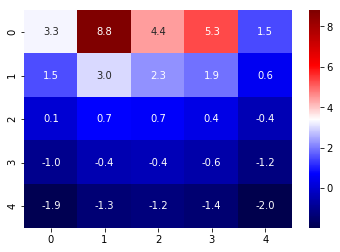

In [6]:
policy_eval(world)
world.show_value()

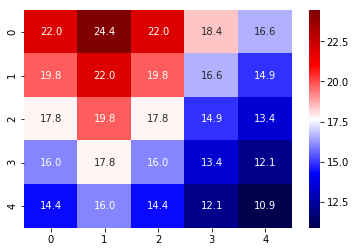

In [7]:
policy_update(world)
policy_eval(world)
world.show_value()

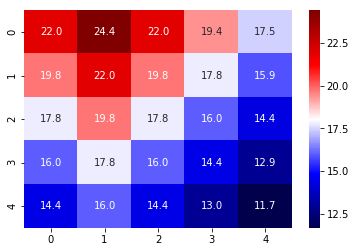

In [8]:
policy_update(world)
policy_eval(world)
world.show_value()

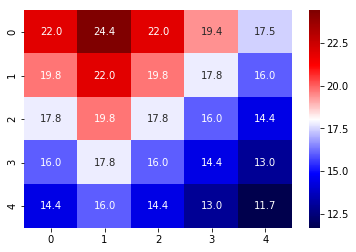

In [9]:
policy_update(world)
policy_eval(world)
world.show_value()